# Testing

## Parse testing data

The testing set doesn't actually have associated annotations so we use the validation set instead

In [1]:
%cd /beegfs/xg703/Vision2018-Pose/src
import numpy as np
from preprocessing import load_data
# from preprocessing_resize import load_data

/beegfs/xg703/Vision2018-Pose/src


In [2]:
data_dir = '/beegfs/xg703/Vision2018-Pose/dataset/COCO/'
data_type = 'val2014'
np.random.seed(0)
X, Y = load_data(data_dir, data_type, num_input=5, verbose=True)

loading annotations into memory...
Done (t=2.27s)
creating index...
index created!
Processing  /beegfs/xg703/Vision2018-Pose/dataset/COCO/images/val2014/COCO_val2014_000000042225.jpg
Processing  /beegfs/xg703/Vision2018-Pose/dataset/COCO/images/val2014/COCO_val2014_000000189193.jpg
Processing  /beegfs/xg703/Vision2018-Pose/dataset/COCO/images/val2014/COCO_val2014_000000302599.jpg
Processing  /beegfs/xg703/Vision2018-Pose/dataset/COCO/images/val2014/COCO_val2014_000000293564.jpg
Processing  /beegfs/xg703/Vision2018-Pose/dataset/COCO/images/val2014/COCO_val2014_000000112769.jpg


## Get predictions 

In [3]:
# Load normalization factors & saved model
# Note to self: only keep one tensorflow runtime up to avoid device error!
from vgg import prestage, normalize_per_channel
from model import stage1

In [4]:
factors = np.load("../dataset/processed/factors_train.npy")
stage1.load_weights("../dataset/models/stage1_weights.h5")

In [5]:
Z = prestage(X.copy()) # copy to avoid changing X
normalize_per_channel(Z, factors)
Y_predict = stage1.predict(Z)

## Visualize results

In [6]:
from config import KEYPOINTS
from plot import plot_on_img
import matplotlib.pyplot as plt

In [14]:
expl = 1
x = X[expl,...] / 255.0 # scale to matplotlib's [0,1] range
y = Y[expl,...]
y_predict = Y_predict[expl,...]

Text(0.5,1,'Ground truth')

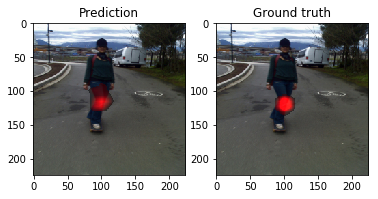

In [15]:
kp = KEYPOINTS.index("right_knee")

plt.figure()
plt.subplot(1,2,1)
plot_on_img(x, y_predict, kp)
plt.title("Prediction")
plt.subplot(1,2,2)
plot_on_img(x, y, kp)
plt.title("Ground truth")